## Sample display of confusion matrix in classification problem

In [1]:
import numpy as np

import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [2]:
# dataset

data = np.random.random((1000, 100))               # shape- 1000, 100
labels = np.random.randint(10, size=(1000, 1))     # shape- # 1000, 1


In [3]:
model = Sequential([
    Dense(16, input_shape=(100,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])



model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,226
Trainable params: 2,226
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(data, labels, validation_split=0.1, batch_size=6, epochs=3, shuffle=True, verbose=1)


Train on 900 samples, validate on 100 samples
Epoch 1/3
900/900 [==============================] - 3s 4ms/step - loss: nan - acc: 0.0922 - val_loss: nan - val_acc: 0.0700
Epoch 2/3
900/900 [==============================] - 1s 942us/step - loss: nan - acc: 0.0922 - val_loss: nan - val_acc: 0.0700
Epoch 3/3
900/900 [==============================] - 1s 923us/step - loss: nan - acc: 0.0922 - val_loss: nan - val_acc: 0.0700


In [7]:
# test data

test_data = np.random.random((1000, 100))               # shape- 1000, 100
test_labels = np.random.randint(10, size=(1000, 1))     # shape- # 1000, 1


### make prediction

In [8]:
predictions = model.predict(test_data, batch_size=10, verbose=1)

1000/1000 [==============================] - 0s 368us/step


In [9]:
# to show prediction in classes instead

class_prediction = model.predict_classes(test_data, batch_size=10, verbose=1)

1000/1000 [==============================] - 0s 135us/step


## see confusion matrix

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from sklearn.metrics import confusion_matrix

In [13]:
cm = confusion_matrix(test_labels, class_prediction)

In [17]:
##code to plot from sklearn site


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Cofusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    
    
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                
                
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[113   0   0   0   0   0   0   0   0   0]
 [ 90   0   0   0   0   0   0   0   0   0]
 [ 98   0   0   0   0   0   0   0   0   0]
 [ 91   0   0   0   0   0   0   0   0   0]
 [115   0   0   0   0   0   0   0   0   0]
 [ 89   0   0   0   0   0   0   0   0   0]
 [107   0   0   0   0   0   0   0   0   0]
 [ 95   0   0   0   0   0   0   0   0   0]
 [ 90   0   0   0   0   0   0   0   0   0]
 [112   0   0   0   0   0   0   0   0   0]]


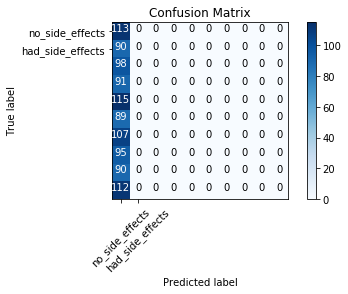

In [18]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')
